# TASK - 7

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
path="../input/cat-and-dog/training_set/training_set"

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = (128, 128)

train_dataset = image_dataset_from_directory(path,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMAGE_SIZE,
                                             validation_split=0.9,
                                             subset="training",
                                             seed=10)
val_dataset  = image_dataset_from_directory(path,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMAGE_SIZE,
                                             validation_split=0.9,
                                             subset="validation",
                                             seed=10)

Found 8005 files belonging to 2 classes.
Using 801 files for training.
Found 8005 files belonging to 2 classes.
Using 7204 files for validation.


In [4]:
import matplotlib.pyplot as plt

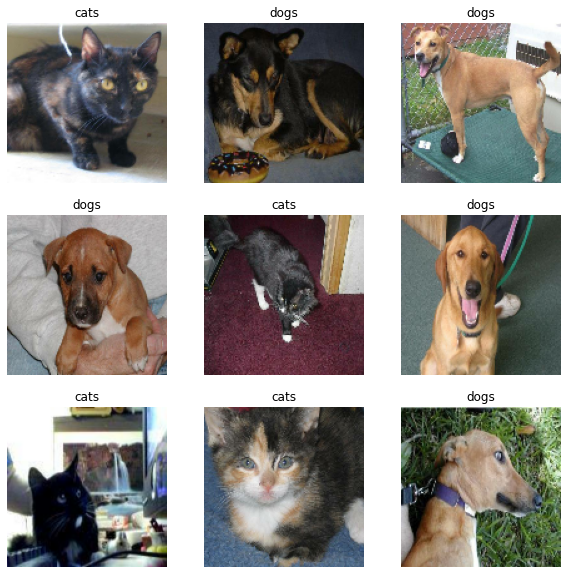

In [5]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
IMG_SHAPE = IMAGE_SIZE + (3,)

In [7]:
IMG_SHAPE

(128, 128, 3)

In [8]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [9]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [10]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [11]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [12]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [13]:
inputs = tf.keras.Input(shape=(128, 128, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [14]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
tf_op_layer_RealDiv (TensorF [(None, 128, 128, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub (TensorFlowO [(None, 128, 128, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_128 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                

**Validating Pre Trained Model**

In [16]:
initial_epochs = 25
loss, accuracy = model.evaluate(val_dataset)

226/226 [==============================] - 17s 75ms/step - loss: 0.6495 - accuracy: 0.5816


In [18]:
print("initial loss: {:.2f}".format(loss))
print("initial accuracy: {:.2f}".format(accuracy))

initial loss: 0.65
initial accuracy: 0.58


**Now training on 800 images**

In [ ]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=val_dataset)

Epoch 1/25
26/26 [==============================] - 15s 582ms/step - loss: 0.6312 - accuracy: 0.6167 - val_loss: 0.5447 - val_accuracy: 0.6599
Epoch 2/25
26/26 [==============================] - 13s 513ms/step - loss: 0.5328 - accuracy: 0.7041 - val_loss: 0.4729 - val_accuracy: 0.7214
Epoch 3/25
26/26 [==============================] - 14s 524ms/step - loss: 0.4766 - accuracy: 0.7553 - val_loss: 0.4180 - val_accuracy: 0.7618
Epoch 4/25
26/26 [==============================] - 13s 507ms/step - loss: 0.4099 - accuracy: 0.7790 - val_loss: 0.3744 - val_accuracy: 0.7939
Epoch 5/25
26/26 [==============================] - 14s 526ms/step - loss: 0.3703 - accuracy: 0.8140 - val_loss: 0.3381 - val_accuracy: 0.8252
Epoch 6/25
26/26 [==============================] - 14s 537ms/step - loss: 0.3251 - accuracy: 0.8352 - val_loss: 0.3140 - val_accuracy: 0.8363
Epoch 7/25
26/26 [==============================] - 13s 516ms/step - loss: 0.2996 - accuracy: 0.8564 - val_loss: 0.2911 - val_accuracy: 0.8608